In [1]:
import seaborn as sns

from scipy.stats import kurtosis, skew

from rcv_distribution import *
from rcv_dimensionality import *
from voting_rules import *

In [2]:
file = "../../rcv_elections_database/classic/Maine_11062018_CongressionalDistrict2.csv"
ballots, candidates = parse_election_data(file)

n = len(candidates)
test = perform_rcv_analysis(file, n_runs=1000)
mds_1d_coordinates, mds_2d_coordinates, most_common_order, order_frequencies, candidate_names = test

normalized_distances = get_distances_normalized(most_common_order, mds_1d_coordinates, candidate_names)
normalized_names = []
normalized_points = []
for candidate in normalized_distances:
    normalized_names.append(candidate)
    normalized_points.append(normalized_distances[candidate])


/Users/es5891/Documents/GitHub/bugs-in-democracy/team_arrow/clean/rcv_dimensionality.py:170: RuntimeWarning: divide by zero encountered in divide
  distance = 1 / np.sqrt(freq_upper_triangle)


In [7]:
print(normalized_distances)
temp = {}
i = 0
for candidate in normalized_distances:
    temp[candidate] = i
    i += 1
bar = {}
bullet = {}
for ballot in ballots:
    if len(ballot) == 0:
        continue
    ballot_num = []
    for candidate in ballot:
        ballot_num.append(temp[candidate])
    
    consistency = evaluate_ballot_consistency(ballot_num)
    if consistency[0] is True:
        point = consistency[1]
        first_place = ballot[0]
        if len(ballot) == 1:
            if normalized_distances[ballot[0]] not in bullet:
                bullet[normalized_distances[ballot[0]]] = 0
            bullet[normalized_distances[ballot[0]]] += ballots[ballot]

        elif normalized_distances[first_place] == 0:
            center = normalized_distances[first_place]
            width = normalized_points[1] - normalized_points[0]
        elif normalized_distances[first_place] == n - 1:
            center = normalized_distances[first_place]
            width = normalized_points[n - 1] - normalized_points[n - 2]
        else:
            if point < normalized_distances[first_place]:
                i = normalized_names.index(first_place)
                center = normalized_distances[first_place] - (normalized_distances[first_place] - normalized_distances[normalized_names[i - 1]])/4
                width = (normalized_distances[first_place] - normalized_distances[normalized_names[i - 1]])/2
            else:
                i = normalized_names.index(first_place)
                center = normalized_distances[first_place] + (normalized_distances[first_place] - normalized_distances[normalized_names[i - 1]])/4
                width = (normalized_distances[normalized_names[i + 1]] - normalized_distances[first_place])/2
        if (center, width) not in bar:
            bar[(center, width)] = 0
        if len(ballot) > 1:
            bar[(center, width)] += ballots[ballot]

x = []
y = []
widths = []
for t in bar:
    x.append(t[0])
    y.append(bar[t]/t[1])
    widths.append(t[1])

x_bullet = []
y_bullet = []
for p in bullet:
    x_bullet.append(p)
    y_bullet.append(bullet[p]/0.2)
    


{'DEM Golden, Jared F.': 0.0, 'Bond, Tiffany L.': 0.9459271114896624, 'Hoar, William R.S.': 1.733120651865034, 'REP Poliquin, Bruce': 3.0}


NameError: name 'center' is not defined

In [ ]:
print(x)
print(y)

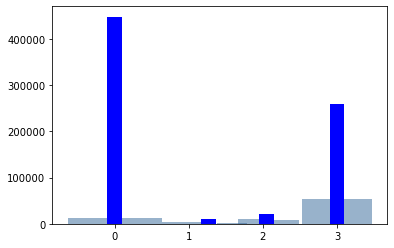

In [ ]:
fig, ax = plt.subplots()
for i in range(len(x)):
    ax.bar(x[i], y[i], width=widths[i], color=(0.2, 0.4, 0.6, 0.5))

for i in range(len(x_bullet)):
    ax.bar(x_bullet[i], y_bullet[i], width=0.2, color="blue")